In [141]:
import pandas as pd
import numpy as np
import json
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn import cluster
from matplotlib import pyplot as plt
import plotly.express as px
import re

In [139]:
champions_embedding = pd.read_csv("results/champions_embedding.csv", index_col=0)
items_embedding = pd.read_csv("results/items_embedding.csv", index_col=0)
training_data = pd.read_csv("results/training_data.csv")
with open("data/items_index.json") as f:
    items_json = json.load(f)
with open("data/champion_index.json") as f:
    champions_json = json.load(f)

# Visualize embeddings

In [103]:
pca = TSNE(n_components=2)
reduced_champions_embedding = tsne.fit_transform(champions_embedding)

pca = TSNE(n_components=2)
reduced_items_embedding = tsne.fit_transform(items_embedding)

[t-SNE] Computing 51 nearest neighbors...
[t-SNE] Indexed 52 samples in 0.000s...
[t-SNE] Computed neighbors for 52 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 52 / 52
[t-SNE] Mean sigma: 1.777528
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.226494
[t-SNE] KL divergence after 1000 iterations: 0.205021
[t-SNE] Computing 53 nearest neighbors...
[t-SNE] Indexed 54 samples in 0.000s...
[t-SNE] Computed neighbors for 54 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 54 / 54
[t-SNE] Mean sigma: 0.973739
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.859509
[t-SNE] KL divergence after 1000 iterations: 0.180024


Text(0.5, 1.0, 'TSNE Visualisation of Items 64-Embedding')

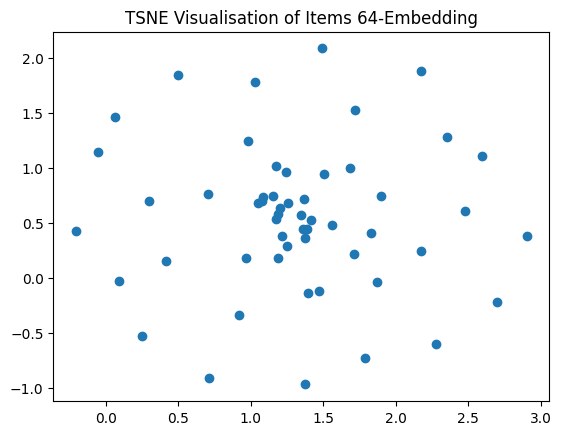

In [106]:
plt.scatter(reduced_items_embedding[:,0], reduced_items_embedding[:,1])
plt.title(f"TSNE Visualisation of Items {items_embedding.shape[1]}-Embedding")

Text(0.5, 1.0, 'TSNE Visualisation of Champions 64-Embedding')

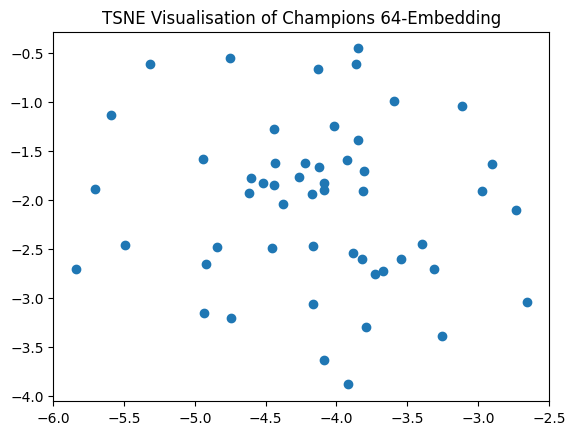

In [107]:
plt.scatter(reduced_champions_embedding[:,0], reduced_champions_embedding[:,1])
plt.title(f"TSNE Visualisation of Champions {champions_embedding.shape[1]}-Embedding")

[t-SNE] Computing 51 nearest neighbors...
[t-SNE] Indexed 52 samples in 0.000s...
[t-SNE] Computed neighbors for 52 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 52 / 52
[t-SNE] Mean sigma: 4.053887
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.130173
[t-SNE] KL divergence after 850 iterations: 0.301399


Text(0.5, 1.0, 'TSNE Visualization of random 64-Embedding ')

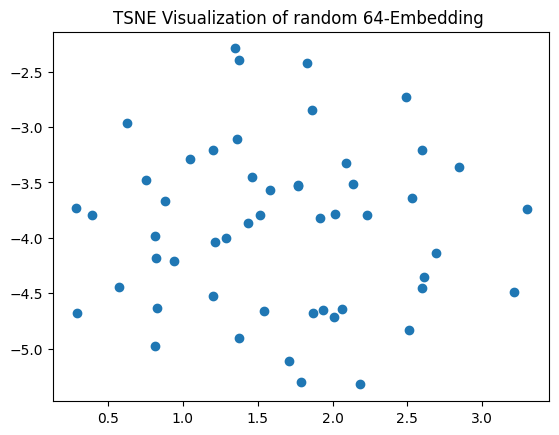

In [109]:
import torch
embedding = torch.nn.Embedding(52, 64)
embedding = next(embedding.parameters()).detach().numpy()
pca = TSNE(n_components=2)
reduced_embedding = tsne.fit_transform(embedding)
plt.scatter(reduced_embedding[:,0], reduced_embedding[:,1])
plt.title("TSNE Visualization of random 64-Embedding ")

# Analyze embedding

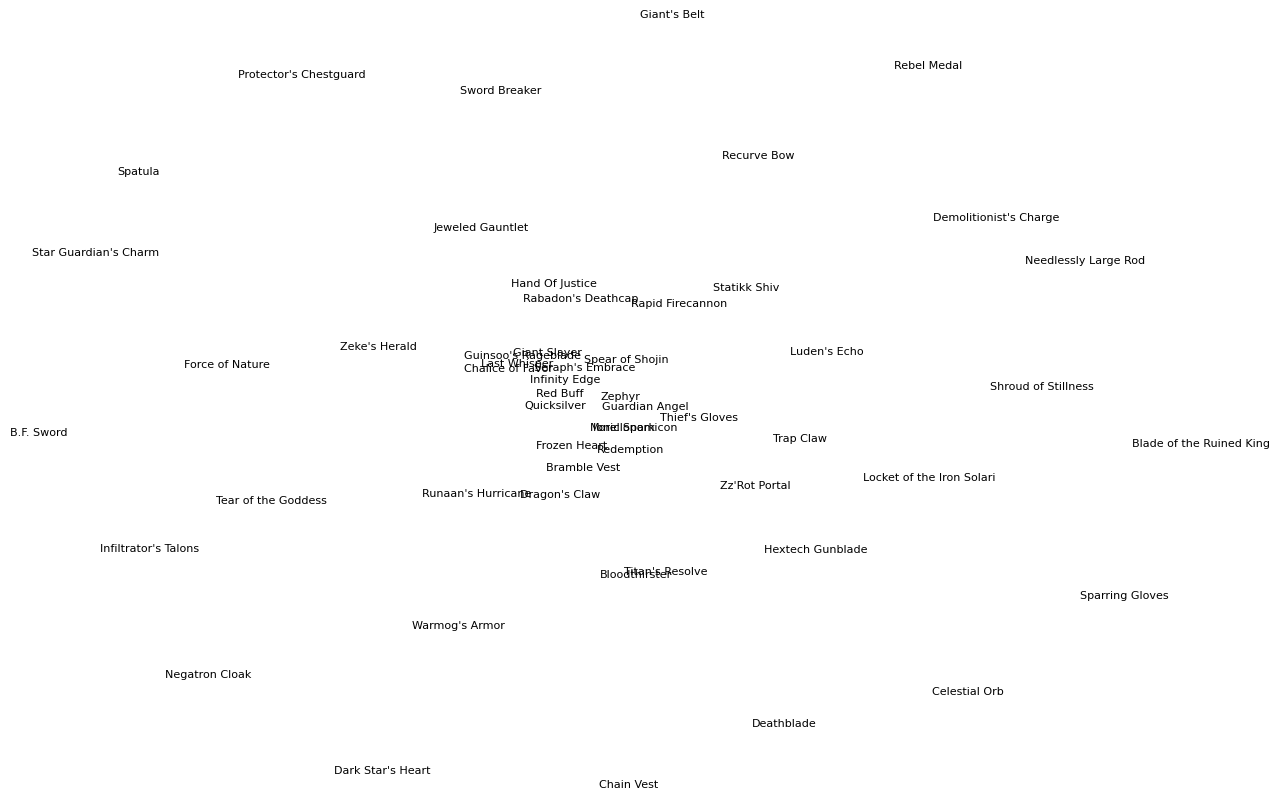

In [130]:
fig, ax = plt.subplots(figsize=(15,10))
texts = []
for pos, text in zip(reduced_items_embedding, items_json.keys()):
    texts.append(ax.text(*pos, text, fontsize=8, ha="center", va="bottom", clip_on=False))
ax.axis("off")
minx, miny = reduced_items_embedding.min(axis=0)
maxx, maxy = reduced_items_embedding.max(axis=0)
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
plt.show()

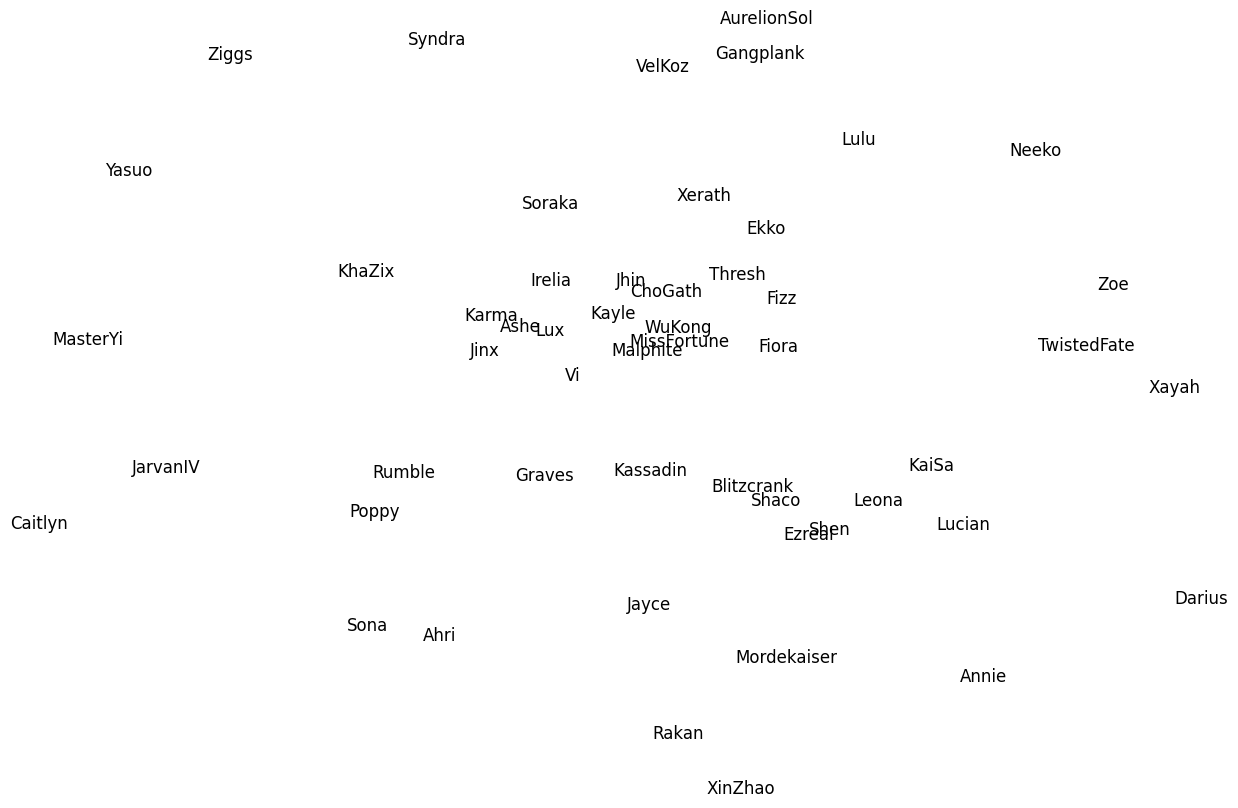

In [138]:
fig, ax = plt.subplots(figsize=(15,10))
texts = []
for pos, text in zip(reduced_champions_embedding, champions_json.keys()):
    texts.append(ax.text(*pos, text, fontsize=12, ha="center", va="bottom", clip_on=False))
ax.axis("off")
minx, miny = reduced_champions_embedding.min(axis=0)
maxx, maxy = reduced_champions_embedding.max(axis=0)
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
plt.show()

I might be wrong, but it seems like Zoe,TwistedFate, and Xayah have the same positioning as the items "Needlessly Large Rod", "Shroud of Stillness", and "Blade of the Ruined King". <br>
In any case, let's see if the closeness of champions/items means something

In [146]:
champion_cols = [col for col in training_data.columns if re.match("character_.*_name", col)]
champion_item_cols = {
    champion_col : [f"character_{i}_item_{x}" for x in range(1, 4)]
    for i, champion_col in enumerate(champion_cols, 1)
}
champion_item_cols

{'character_1_name': ['character_1_item_1',
  'character_1_item_2',
  'character_1_item_3'],
 'character_2_name': ['character_2_item_1',
  'character_2_item_2',
  'character_2_item_3'],
 'character_3_name': ['character_3_item_1',
  'character_3_item_2',
  'character_3_item_3'],
 'character_4_name': ['character_4_item_1',
  'character_4_item_2',
  'character_4_item_3'],
 'character_5_name': ['character_5_item_1',
  'character_5_item_2',
  'character_5_item_3'],
 'character_6_name': ['character_6_item_1',
  'character_6_item_2',
  'character_6_item_3'],
 'character_7_name': ['character_7_item_1',
  'character_7_item_2',
  'character_7_item_3'],
 'character_8_name': ['character_8_item_1',
  'character_8_item_2',
  'character_8_item_3'],
 'character_9_name': ['character_9_item_1',
  'character_9_item_2',
  'character_9_item_3'],
 'character_10_name': ['character_10_item_1',
  'character_10_item_2',
  'character_10_item_3'],
 'character_11_name': ['character_11_item_1',
  'character_11_item

### How often have champions been picked together?

In [205]:
champions_df = training_data[champion_cols]
items_df = training_data[[item_col for all_cols in champion_item_cols.values() for item_col in all_cols]]
# Count how often a champion occurs in each row, if it occurs multiple times per row treat it as 1
champions_occurance_count = {
    champion_id : (champions_df == champion_id).sum(axis=1).clip(0, 1).sum()
    for champion_id in champions_json.values()
}

champions_coupled_occurance_dfs = {
    (c1, c2) : (champions_df == c1).any(axis=1) & (champions_df == c2).any(axis=1)
    for c1 in champions_json.values()
    for c2 in champions_json.values()
    if c1 < c2
}
champions_coupled_occurance_probs = {
    (c1, c2) : df.sum() / ((champions_df == c1).any(axis=1) | (champions_df == c2).any(axis=1)).sum()
    for (c1, c2), df in champions_coupled_occurance_dfs.items()
}

In [208]:
sorted_champions = sorted(champions_coupled_occurance_probs.items(), key=lambda x: x[1], reverse=True)
champion_name_lookup = {champion_id : name for name, champion_id in champions_json.items()}
for (c1, c2), prob in sorted_champions:
    print(champion_name_lookup[c1], champion_name_lookup[c2], champions_occurance_count[c1], champions_occurance_count[c2], prob)

Ahri Syndra 8499 8461 0.9150858175248419
Rumble Annie 11760 11765 0.9054754576381014
Fizz Rumble 11560 11760 0.8991774574476749
Fizz Annie 11560 11765 0.898038896574172
ChoGath Malphite 18290 18516 0.8669980724358324
Ahri Zoe 8499 9026 0.8464861447687283
Syndra Zoe 8461 9026 0.8324426281043696
XinZhao Rakan 6843 7839 0.7708358460981788
Malphite Jinx 18516 16850 0.7703358862692096
ChoGath Jinx 18290 16850 0.7335109269399634
Ashe Jhin 17649 14561 0.7291174575907237
Jhin Mordekaiser 14561 12983 0.7195654888250718
ChoGath Blitzcrank 18290 24145 0.7064098439761943
KaiSa Rumble 11935 11760 0.6992971887550201
KaiSa Annie 11935 11765 0.6957641671436748
KaiSa Fizz 11935 11560 0.6941880588404961
Graves Jinx 13504 16850 0.6940506752985824
Malphite Blitzcrank 18516 24145 0.6880069639536264
Yasuo MasterYi 4131 3821 0.6590861673273524
ChoGath Graves 18290 13504 0.624795584627964
Blitzcrank Ezreal 24145 23573 0.616080197785078
ChoGath Vi 18290 27744 0.6092990735885335
Malphite Graves 18516 13504 0.60

### How often have items been picked with a champion

In [226]:
champion_item_dfs = {
    champion_col : items_df[items_cols]
    for champion_col, items_cols in champion_item_cols.items()
}

items_occurances = {
    (champion_col, item_id) : (item_id == items_df).any(axis=1).clip(0, 1)
    for champion_col, items_df in champion_item_dfs.items()
    for item_id in items_json.values()
}

In [231]:
items_occurances[("character_1_name", 1)] + items_occurances[("character_1_name", 1)]

0        False
1        False
2        False
3        False
4        False
         ...  
79994    False
79995    False
79996    False
79997    False
79998    False
Length: 79999, dtype: bool

In [216]:
items_json.values()

dict_values([1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 44, 45, 46, 47, 48, 49, 55, 56, 57, 58, 59, 66, 67, 68, 69, 77, 78, 79, 88, 89, 99])